In [323]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import os
import requests
import json
import re
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [79]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

ModuleNotFoundError: No module named 'tweepy'

In [324]:
df = pd.read_csv("twitter-archive-enhanced-2.csv")

In [325]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
image_df= pd.read_csv('image-predictions-3.tsv', sep='\t')

### Regarding twitter API, i applied for an API from twitter developer website, and they declined my request as i stated to my mentor Elisa R. So she adviced me to use the json file instead of gathering my data using the twitter API<br><br>

In [326]:
#Array to store all the tweets from the json file
tweets_data = []
with open('tweet.json') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
df_api = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

In [327]:
df_api

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9774,41048,False,False,False,False,en
5,Sat Jul 29 00:08:17 +0000 2017,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,3261,20562,False,False,False,False,en
6,Fri Jul 28 16:27:12 +0000 2017,890971913173991426,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,2158,12041,False,False,False,False,en
7,Fri Jul 28 00:22:40 +0000 2017,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,16716,56848,False,False,False,False,en
8,Thu Jul 27 16:25:51 +0000 2017,890609185150312448,890609185150312448,This is Zoey. She doesn't want to be one of th...,False,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4429,28226,False,False,False,False,en
9,Wed Jul 26 15:59:51 +0000 2017,890240255349198849,890240255349198849,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,7711,32467,False,False,False,False,en


In [328]:
# i took the most important columns which are tweet id, retweet count, and favorite count
tweet_df = df_api[['id', 'retweet_count', 'favorite_count']]
 
tweet_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [329]:
# Save tweet in Dataframe 
tweet_df.to_csv("tweet_json.csv")

# Copy Dataframes for Cleaning so it can be compared with orginal after merging and cleaning dataframe.
df_clean = df.copy()
image_clean = image_df.copy()
tweet_clean = tweet_df.copy()

In [330]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [331]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [332]:
df_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [333]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [334]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [335]:
image_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [336]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [337]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [338]:
tweet_clean

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


# **Data Quality issues**

## Data Quality issue #1
### **df_clean**
> First we need to remove tweet that has been retweet as its not original.<br>Second, change tweet_id from number to string. <br>Third,remove columns that are not needed for analysis.<br>last,Change timestamp from string to date time and make separate columns for date and time.

## Data Quality issue #2
### **image_clean**
>p1 column: capitalize the first letter of each word, make consistent<br>
p2 column: capitalize the first letter of each word, make consistent<br>
p3 column: capitalize the first letter of each word, make consistent<br>
Remove underscors between the words

## Data Quality issue #3
### **tweet_clean**
>Rename the id column to "tweet_id" to match the other 2 tables

# Tidiness Issues
### 1- df_clean <br>
>dog stage has four different columns (doggo, floofer, pupper, and puppo)<br>

### 2- tweet_clean dataframe<br>
>twitter data should be combined with the df_clean data.

### 3- image_clean dataframe<br>
>images data could be combined with the twitter1 data as well since it is all information about 1 tweet

### First we will start with the data quality issues

### Quality issue #1

**Define: remove tweet that has been retweet as its not original.**

**Code**

In [339]:
df_clean = df_clean[pd.isnull(df_clean.retweeted_status_id)]
# removing duplicates
df_clean = df_clean.drop_duplicates()

# Delete columns related to retweet we don't need anymore

df_clean = df_clean.drop('retweeted_status_id', 1)
df_clean = df_clean.drop('retweeted_status_user_id', 1)
df_clean = df_clean.drop('retweeted_status_timestamp', 1)

### Test

In [340]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [341]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


In [342]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Quality issue #2

**Define: remove columns that are not needed for analysis**

**Code**

In [343]:
# removing unnessary columns
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace= True)

**Test**

In [344]:
#checking if columns are removed
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Quality issue #3

**Define: Change timestamp from string to date time and make separate columns for date and time.**

**Code**

In [345]:
#converting from string to timestamp
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['date'] = df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_clean['time'] = df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

**Test**

In [346]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [347]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issue #4

**Define:p1,p2 and p3 have inconsisitent capital words.**

**Code**

In [348]:
#to make all string lower case I will use lower() function on p1 ,p2 and p3 

image_clean['p1'] = image_clean['p1'].str.lower()
image_clean['p2'] = image_clean['p2'].str.lower()
image_clean['p3'] = image_clean['p3'].str.lower()

**Test**

In [349]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Quality issue #5

**Define: Drop duplicate jpg_url.**

**Code**

In [350]:
# dropping duplicates jpg_url
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

**Test**

In [351]:
# testing if above code works
sum(image_clean['jpg_url'].duplicated())

0

### Quality issue #6

**Define: p1,p2 and p3 have unnessary underscore instead of space**

**Code**

In [352]:
# simply using string.replace function to repalce _ 
image_clean['p1'] = image_clean['p1'].str.replace('_', ' ')
image_clean['p2'] = image_clean['p2'].str.replace('_', ' ')
image_clean['p3'] = image_clean['p3'].str.replace('_', ' ')

In [353]:
# using rename function changing column name from id to tweet_id because we need to merge it
tweet_clean.rename({'id': 'tweet_id'}, axis=1, inplace=True)

**Test**

In [354]:
tweet_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [355]:
# using as type function changing format type from number to string on all three dataframe

df_clean['tweet_id'] = df_clean['tweet_id'].astype('str')
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype('str')

#### Now all the tweet_id in the three dataframes are strings

In [356]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07-30-2017,15:58
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07-29-2017,16:00
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,07-29-2017,00:08
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,07-28-2017,16:27
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,07-28-2017,00:22
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,07-27-2017,16:25
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,07-26-2017,15:59


### Quality issue #7

**Define: rename id to tweet_id so can merge later**

In [357]:
# using rename function changing column name from id to tweet_id
tweet_clean.rename({'id': 'tweet_id'}, axis=1, inplace=True)

**Test**

In [358]:
tweet_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Quality issue #8

**Define: change tweet_id from number to string.**

**Code**

In [359]:
# using as type function changing format type from number to string on all three dataframe

df_clean['tweet_id'] = df_clean['tweet_id'].astype('str')
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype('str')

**Test**

In [360]:
type(df_clean['tweet_id'].iloc[0])
type(image_clean['tweet_id'].iloc[0])
type(tweet_clean['tweet_id'].iloc[0])

str

### Quality issue #9

**Define:Remove incorrect dogs name**

**Code**

In [361]:
df_clean.drop(df_clean[df_clean['name'] == 'a'].index, inplace = True) 
df_clean.drop(df_clean[df_clean['name'] == 'the'].index, inplace = True) 
df_clean.drop(df_clean[df_clean['name'] == 'an'].index, inplace = True) 
df_clean.drop(df_clean[df_clean['name'] == 'such'].index, inplace = True) 

**Test**

In [362]:
df_clean['name'].value_counts()

None         680
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Winston        8
Lola           8
Sadie          8
Daisy          7
Toby           7
Bailey         6
Oscar          6
Bella          6
Bo             6
Stanley        6
Koda           6
Jax            6
Rusty          5
Bentley        5
Leo            5
Louis          5
Buddy          5
Scout          5
Milo           5
Dave           5
Chester        5
Brody          4
Clarence       4
            ... 
Snoopy         1
Todo           1
Rover          1
Stu            1
Ralphé         1
Mo             1
Leonard        1
Dido           1
Reagan         1
Tove           1
Maisey         1
Fiji           1
Richie         1
Sephie         1
Rubio          1
Kenny          1
Laela          1
DayZ           1
Saydee         1
Ron            1
Dunkin         1
Edgar          1
Alexander      1
light          1
Binky          1
Alfy           1
Meera          1
Humphrey      

In [363]:
df_clean["rating_numerator"]= df_clean["rating_numerator"].astype(float) 


In [364]:
ratings = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [365]:
df_clean.rating_numerator = ratings

In [366]:
df_clean


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07-30-2017,15:58
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07-29-2017,16:00
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,07-29-2017,00:08
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,07-28-2017,16:27
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,07-28-2017,00:22
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,07-27-2017,16:25
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,07-26-2017,15:59


In [367]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2105 non-null object
timestamp             2105 non-null datetime64[ns]
source                2105 non-null object
text                  2105 non-null object
expanded_urls         2047 non-null object
rating_numerator      2105 non-null object
rating_denominator    2105 non-null int64
name                  2105 non-null object
doggo                 2105 non-null object
floofer               2105 non-null object
pupper                2105 non-null object
puppo                 2105 non-null object
date                  2105 non-null object
time                  2105 non-null object
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 246.7+ KB


In [368]:
df_clean.loc[df['tweet_id'] == 786709082849828864]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None,10-13-2016,23:23


### Tidiness Issues

#### Tidiness Issue #1

**Define: combining dog stages to one column.**

**Code**

In [369]:
# create new colum dog_stages for doggo, floofer, pupper and puppo

df_clean['dog_stages'] = df_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)
df_clean['dog_stages'].replace("NoneNoneNoneNone","None ", inplace=True) # if all none then filled with none
df_clean['dog_stages'].replace("doggoNoneNoneNone","doggo", inplace=True)# if doggo then filled with doggo
df_clean['dog_stages'].replace("NoneflooferNoneNone","floofer", inplace=True)# if floofer then filled with floofer
df_clean['dog_stages'].replace("NoneNonepupperNone","pupper", inplace=True)# if pupper then filled pupper
df_clean['dog_stages'].replace("NoneNoneNonepuppo","puppo", inplace=True)# if puppo then filled puppo

df_clean['dog_stages'].replace("doggoNonepupperNone","doggo, pupper", inplace=True)
df_clean['dog_stages'].replace("doggoflooferNoneNone","doggo, floofer", inplace=True)
df_clean['dog_stages'].replace("doggoNoneNonepuppo","doggo, puppo", inplace=True)

**Test**

In [370]:
df_clean['dog_stages'].value_counts()

None              1767
pupper             218
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stages, dtype: int64

In [371]:
#removing doggo, floofer, pupper and puppo columns, since we combined this data in one column which is dog stage

df_clean.drop(['doggo','floofer', 'pupper','puppo'], axis=1, inplace= True)

#### Tidiness Issue #2

**Define: Newly created Date and time column needed to change from object(string) to date time format.**

**Code**

In [372]:
#using pandas to_datetime function for converting from string to date time format

df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['time'] = pd.to_datetime(df_clean['time'])

**Test**

In [373]:
# checking if format change by above code
type(df_clean['date'].iloc[0])
type(df_clean['time'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Tidiness Issue #4

**Define: Merge df_clean, image_clean and twitter_clean dataframes.**

**Code**

In [374]:
# using merge function make one final dataframe
 
df_master = pd.merge(df_clean, image_clean, on ='tweet_id', how= 'inner' )
df_master = pd.merge(df_master, tweet_clean, on = 'tweet_id', how = 'inner' )

**Test**

In [375]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860 entries, 0 to 1859
Data columns (total 24 columns):
tweet_id              1860 non-null object
timestamp             1860 non-null datetime64[ns]
source                1860 non-null object
text                  1860 non-null object
expanded_urls         1860 non-null object
rating_numerator      1860 non-null object
rating_denominator    1860 non-null int64
name                  1860 non-null object
date                  1860 non-null datetime64[ns]
time                  1860 non-null datetime64[ns]
dog_stages            1860 non-null object
jpg_url               1860 non-null object
img_num               1860 non-null int64
p1                    1860 non-null object
p1_conf               1860 non-null float64
p1_dog                1860 non-null bool
p2                    1860 non-null object
p2_conf               1860 non-null float64
p2_dog                1860 non-null bool
p3                    1860 non-null object
p3_conf      

**now we need to save that data frame into a csv file, we will call it df_master**

In [376]:
#using to_csv to write master dataframe to CSV format

df_master.to_csv('twitter_archive_master.csv', index= False, encoding='utf-8')

In [377]:
df_master.describe()

,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1860.000000,1860.000000,1860.000000,1.860000e+03,1.860000e+03,1860.00000,1860.000000
mean,10.553226,1.204301,0.593690,1.334877e-01,6.008100e-02,2561.68172,8468.673656
std,7.520520,0.559704,0.274058,1.003780e-01,5.097257e-02,4226.06250,11428.672047
min,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.00000,81.000000
25%,10.000000,1.000000,0.359244,5.378615e-02,1.587760e-02,635.75000,2043.250000
50%,10.000000,1.000000,0.587026,1.160130e-01,4.933745e-02,1335.50000,4032.000000
75%,10.000000,1.000000,0.850559,1.939397e-01,9.162278e-02,3008.00000,10615.750000
max,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.00000,132810.000000


In [378]:
df_master.p1.value_counts()
df_master.p2.value_counts()
df_master.p3.value_counts()

labrador retriever                72
chihuahua                         56
golden retriever                  41
eskimo dog                        32
kelpie                            31
chow                              30
pekinese                          28
staffordshire bullterrier         28
toy poodle                        28
beagle                            28
kuvasz                            27
cocker spaniel                    26
great pyrenees                    25
pembroke                          25
pomeranian                        24
malamute                          24
french bulldog                    23
american staffordshire terrier    22
chesapeake bay retriever          21
cardigan                          21
bull mastiff                      19
basenji                           19
siberian husky                    19
pug                               17
boston bull                       17
shetland sheepdog                 16
boxer                             16
t

# Visualization

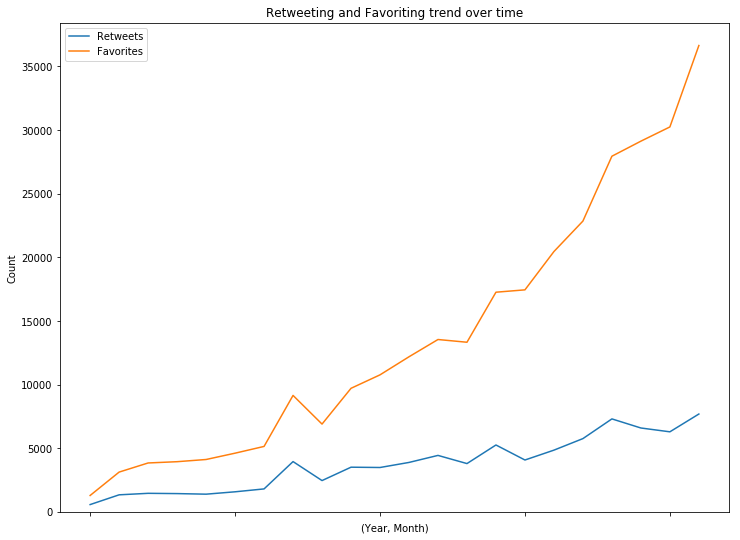

In [379]:
plt.rcParams["figure.figsize"] = [12, 9]
plt.subplots(1, sharex=True)
df_master.retweet_count.groupby([df_master["timestamp"].dt.year, df_master["timestamp"].dt.month]).mean().plot('line')
df_master.favorite_count.groupby([df_master["timestamp"].dt.year, df_master["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))

<Figure size 720x720 with 0 Axes>

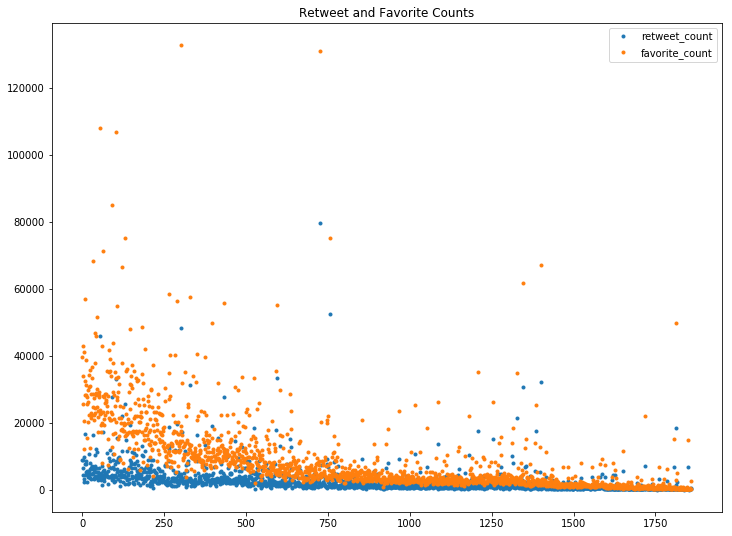

In [380]:
plt.figure(figsize = (10, 10))
df_master[['retweet_count', 'favorite_count']].plot(style = '.')
plt.title('Retweet and Favorite Counts');

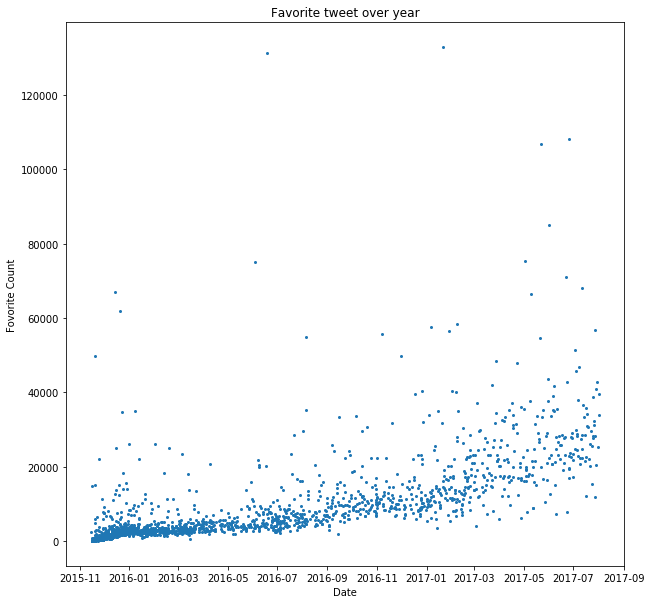

In [381]:
plt.figure(figsize = (10, 10))
plt.plot(df_master.date,df_master.favorite_count, marker = 'o', linestyle = '', ms = 2)
plt.title('Favorite tweet over year')
plt.xlabel('Date')
plt.ylabel('Fovorite Count')
plt.show()

In [382]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860 entries, 0 to 1859
Data columns (total 24 columns):
tweet_id              1860 non-null object
timestamp             1860 non-null datetime64[ns]
source                1860 non-null object
text                  1860 non-null object
expanded_urls         1860 non-null object
rating_numerator      1860 non-null object
rating_denominator    1860 non-null int64
name                  1860 non-null object
date                  1860 non-null datetime64[ns]
time                  1860 non-null datetime64[ns]
dog_stages            1860 non-null object
jpg_url               1860 non-null object
img_num               1860 non-null int64
p1                    1860 non-null object
p1_conf               1860 non-null float64
p1_dog                1860 non-null bool
p2                    1860 non-null object
p2_conf               1860 non-null float64
p2_dog                1860 non-null bool
p3                    1860 non-null object
p3_conf      

In [383]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2105 non-null object
timestamp             2105 non-null datetime64[ns]
source                2105 non-null object
text                  2105 non-null object
expanded_urls         2047 non-null object
rating_numerator      2105 non-null object
rating_denominator    2105 non-null int64
name                  2105 non-null object
date                  2105 non-null datetime64[ns]
time                  2105 non-null datetime64[ns]
dog_stages            2105 non-null object
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 197.3+ KB
